<a href="https://colab.research.google.com/github/SRezaA102/MachineLearningTask/blob/main/Minggu9/9_Regression_Case_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS 9
*   NAMA = Syahrul Reza Ananda
*   NIM = 1103210113
*   Model = Neural Network
*   Dataset = housepricedata.csv

# **Promp Chat-GPT**
1. berikan kode untuk konek google colab
2. beri kode untuk membaca dataset
3. Here's my dataframe column: LotArea    OverallQual    OverallCond    TotalBsmtSF    FullBath    HalfBath    BedroomAbvGr    TotRmsAbvGrd    Fireplaces    GarageArea    AboveMedianPrice

Give the code to create neural network model, with following specification:
- Set AboveMedianPrice as target column, the other as feature columns
- preprocess data using normalization [0,1] for all the feature columns
- Split the data into 70% data train, 30% for data validation and testing
- Split into 50% data test and data validation of the 30% of data validation and test,
- Create NN as this architecture:
   Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
- Set this architecture:
   optimizer='sgd',
   loss='binary_crossentropy',
   metrics=['accuracy'],
  batch_size=32, epochs=100,
- batch size
- Visualizing Loss and Accuracy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Hubungkan Dataset**

In [ ]:
url = "/content/drive/MyDrive/Machine Learning/Minggu 10/housepricedata.csv"
# Membaca file CSV dan membuat DataFrame
df = pd.read_csv(url)

# **Isi dataset**

In [ ]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


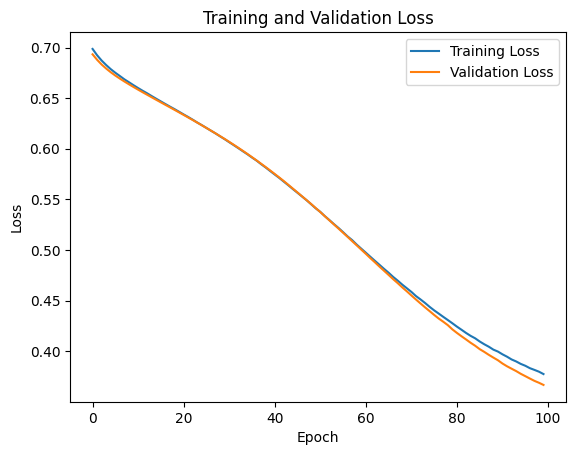

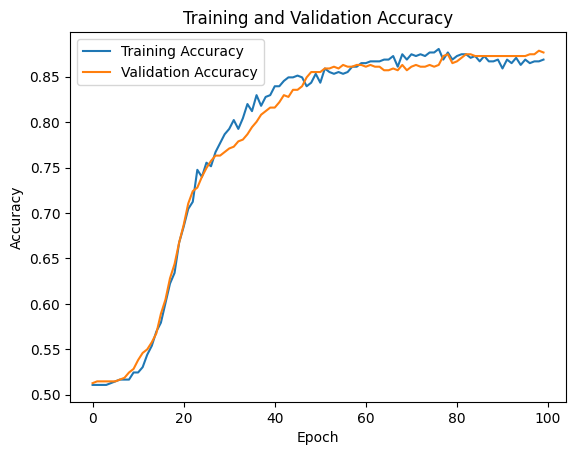

In [ ]:
# Separate features and target variable
X = df.drop(columns=['AboveMedianPrice'])
y = df['AboveMedianPrice']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

# Plot loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
